<a href="https://colab.research.google.com/github/Ravitejatalluri/Hands-on-2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HANDS-ON SESSION-II: DATA MINING TOOLS

RAVI TEJA TALLURI

CLASSIFICATION MODELS

IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

DATA IMPORTING

In [3]:
data_realest = pd.read_csv('/realest.csv')
data_realest

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


Checking the null values


In [4]:
null_miss=data_realest.isnull().sum()
null_miss

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


Handling the missing values

In [5]:

# Drop rows where 'Price' is missing, as it is our target variable
data_realest = data_realest.dropna(subset=['Price'])

# Impute missing values in other columns with the median of each column
data_realest.fillna(data_realest.median(), inplace=True)

# Verify there are no remaining missing values
missing_values = data_realest.isnull().sum()
missing_values


<ipython-input-5-0370d7270c00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_realest.fillna(data_realest.median(), inplace=True)


,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


The null value from price column was removed. the remaining columns null values were replaced with the median of the remaining data.

Split the data into training and testing for regression.

In [10]:
data_realest['Price'].median()


median = data_realest['Price'].median()
data_realest['average'] = np.where(data_realest['Price'] > median, 1,0)

<ipython-input-10-c576b60f66a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_realest['average'] = np.where(data_realest['Price'] > median, 1,0)


In [12]:
x = data_realest.drop(['Price','average'], axis=1)
y = data_realest['average']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)

In [14]:
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
y_pred = decision.predict(x_test)

In [17]:
prediction =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction


,Actual,Predicted
96,1,1
69,1,1
82,1,1
76,0,0
114,1,1
29,1,1
94,1,1
132,1,1
93,1,1
139,1,1


In [20]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:\n",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.89      1.00      0.94        24

    accuracy                           0.93        44
   macro avg       0.94      0.93      0.93        44
weighted avg       0.94      0.93      0.93        44

Confusion Matrix:
 [[17  3]
 [ 0 24]]
Accuracy:
 0.9318181818181818


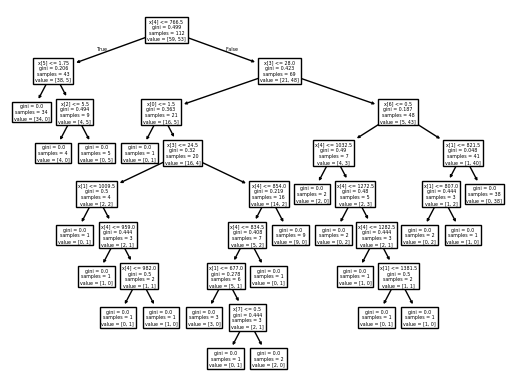

In [21]:
tree.plot_tree(decision)
plt.show()

In [22]:
random = RandomForestClassifier()
random.fit(x_train, y_train)
y_pred = random.predict(x_test)

In [23]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': random.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

     Feature  Importance
4        Tax    0.305696
1      Space    0.205117
3        Lot    0.162948
6     Garage    0.117171
5   Bathroom    0.069333
0    Bedroom    0.058151
2       Room    0.053672
7  Condition    0.027911


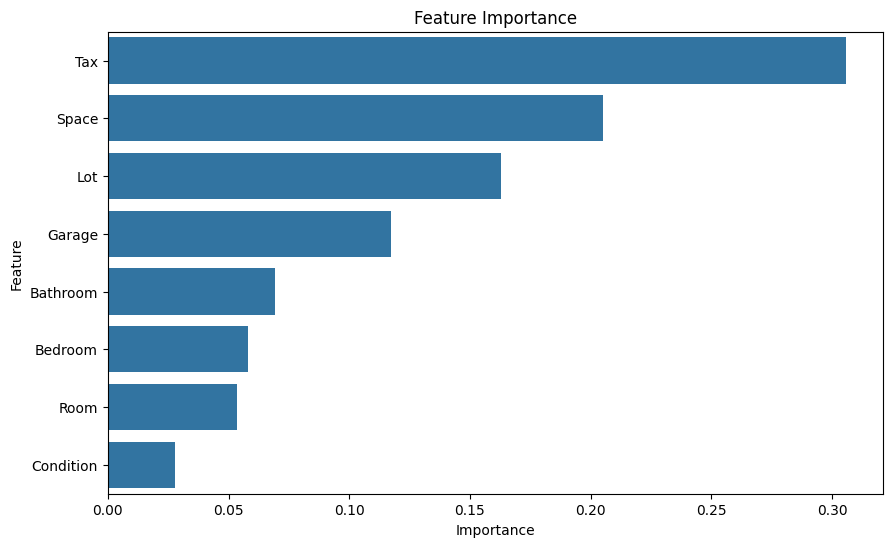

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [25]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:\n",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        24

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44

Confusion Matrix:
 [[19  1]
 [ 1 23]]
Accuracy:
 0.9545454545454546


In [26]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)
y_pred = gradient.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:\n",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.87      0.83      0.85        24

    accuracy                           0.84        44
   macro avg       0.84      0.84      0.84        44
weighted avg       0.84      0.84      0.84        44

Confusion Matrix:
 [[17  3]
 [ 4 20]]
Accuracy:
 0.8409090909090909


Conclusion:

Decision Tree :    0.93

Random Forest :   0.95

Gradient Boost :    0.84

In this analysis, Random Forest achieved the highest accuracy at 0.95, making it the best-performing model for predicting house prices. The Decision Tree model followed closely with an accuracy of 0.93, demonstrating strong performance while remaining simple and interpretable. Gradient Boosting had a slightly lower accuracy of 0.84, likely due to its sensitivity to tuning requirements. Overall, Random Forest proved to be the most reliable and accurate model for this dataset, with Decision Tree also being a strong contender.